####**Q4 ->  To change the value of sigma for testing purpose, please change the value of r in the 3rd cell("Create required initial paramters for SOM" section)**
#####Currently the value of radius/spread r=30, as that gave a perfect SOM compared to other radius values.

###**Importing the Libraries required to implement Kohonens's Self Organizing Maps**

In [ ]:
from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline

###**Creating the training input dataset**
####Training Data consists of 24 colours in shades of Red, Green, Blue, Yellow, Teal and pink - from RGB Colour Table

In [ ]:
dataset = [[204, 0, 0], [255, 102, 102], [255, 204, 204], [0, 102, 0],
           [0, 153, 0], [0, 255, 0], [51, 255, 51], [153, 255, 153],
           [0, 204, 204], [0, 255, 255], [102, 255, 255], [204, 255, 255],
           [204, 204, 0], [255, 255, 0], [255, 255, 102], [255, 255, 153],
           [0, 76, 153], [0 ,102, 204], [0, 128, 255], [102, 178, 255],
           [255, 0, 127], [255, 51, 153], [255,102,178], [255, 153, 204]]

dataset = np.array(dataset)
#print(dataset)
print(dataset.shape)

# Calibrate the color codes to values between 0 and 1, instead of being between 0 and 255.
cal_dataset = dataset/255
#print(cal_dataset)
data = cal_dataset
m = cal_dataset.shape[0]
n = cal_dataset.shape[1]
print("m:", m)
print("n:", n)

(24, 3)
m: 24
n: 3


###**Create the required initial paramters required for SOM**
#####As mentioned in the question 
#####The initial learning rate is = 0.8, which would be decreasing after each epoch.
#####Total number of epochs = 1000
#####Sigma/Radius = [1,10,30,50,70]

In [ ]:
#The SOM features map's dimensions, Total Number of epochs
SOM_dimensions = np.array([100, 100])
total_epochs = 1000
init_learning_rate = 0.8
l= 0.8
sigma_DB = [1, 10, 30, 50, 70] #Already defined in question
sigma_init = sigma_DB[0]
radius = sigma_DB[0]
m = 3
r = 30
# Take random value from SOM_dimentions i.e. 100x100
net = np.random.random((SOM_dimensions[0], SOM_dimensions[1], 3))
print("net:", net.shape)
#print(net)

net: (100, 100, 3)


###**Defining the functions for decaying learning rate, decaying sigma/radius and the neighbourhood function**

In [ ]:
# 1. Decay radius is the sigma (remember the shrinking of Bell curve) 
# Formula: sigma(k) = sigma(0) exp (-k/T);
# k - current training epoch,
# T - total number of training cycles/epochs

def decay_learning_rate(initial_learning_rate, k, total_epochs):
    return initial_learning_rate * np.exp(-k / total_epochs)

def neighbourhood_func(distance, radius):
    return np.exp(-distance / (2* (radius**2)))

###**Function to find the Winning neuron**

In [ ]:
#Function to find the winning neuron:
def find_winning_neuron(t, net):

    bmu_idx = np.array([0, 0])
    min_dist = np.iinfo(np.int).max
    #print("min_dist: ", min_dist)
    
    # calculate the distance between each neuron in the feature map and the input 
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            #print("net[x,y, :] = ", net[x,y, :])
            w = net[x, y, :].reshape(3, 1)
            #print("w is = " , w)
            sq_dist = np.sum((w - t) ** 2)
            sq_dist = np.sqrt(sq_dist)
            if sq_dist < min_dist:
                min_dist = sq_dist # dist
                bmu_idx = np.array([x, y]) # id
    
    bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(3, 1)
    return (bmu, bmu_idx)

###**Function to update the weights of the Winning neuron and its neighbour neurons**

In [ ]:
def update_weights(t, net, bmu, bmu_idx, r, l):
  for x in range(net.shape[0]):
      for y in range(net.shape[1]):
          w = net[x, y, :].reshape(3, 1)
          w_dist = np.sum((np.array([x, y]) - bmu_idx) ** 2)
          w_dist = np.sqrt(w_dist)
            
          if w_dist <= r:
            
       # calculate the Winning neuron's neighbours
            influence = neighbourhood_func(w_dist, r)
                
          # new w = old w + (learning rate * influence * delta)
          # where delta = input vector (t) - old w
            new_w = w + (l * influence * (t - w))
          #print("Net value: ", net[x, y, :])
            net[x, y, :] = new_w.reshape(1, 3)

In [ ]:
def plot_graph(net, total_epochs, i):
  fig = plt.figure()

  ax = fig.add_subplot(111, aspect='equal') 
  ax.set_xlim((0, net.shape[0]+1))
  ax.set_ylim((0, net.shape[1]+1))
  ax.set_title('Self-Organising Map after %d iterations' % i)

  # plot
  for x in range(1, net.shape[0] + 1):
      for y in range(1, net.shape[1] + 1):
          ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                       facecolor=net[x-1,y-1,:],
                       edgecolor='none'))
  plt.show()

###**Final step - putting everything together**

#####The feature map consists of 100x100 grids of neuron.Each neuron has three weights, one for each element of the input vector: red, green and blue.
#####The value of the radius/spread changes from 1,10, 30, 50, 70.
#####For each value of the radius we have run 1000 epochs and at we'll display the feature graph at intervals of 20, 40, 100 and 1000.
#####Hence in total we'll be having 20 graphs generated which will help us to have a deeper understanding of how Kohonen's Self Organizing map works.

Learning rate is:  0.6491161885147295


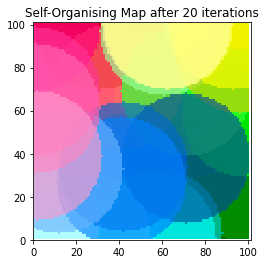

Learning rate is:  0.3526978451598051


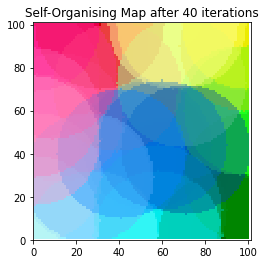

Learning rate is:  0.005132596788350284


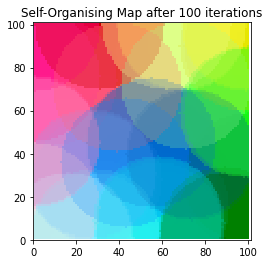

Learning rate is:  3.460477970831537e-218


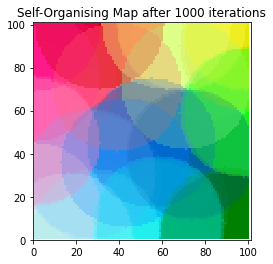

In [ ]:
for i in range(1, total_epochs + 1):
    if i==1:
      l = 0.8
    else:
      l = decay_learning_rate(l, i, total_epochs)
    #There are a total of 1000 epochs-> in 1 Epoch we have to find send all 24 inputs and find the W.N (to update the weights), similarly for  all 1000 epochs
    for iter in range(data.shape[0]):
      t = np.array(data[iter]).reshape(np.array([3, 1]))
    
      # Find the Winning neuron Unit
      bmu, bmu_idx = find_winning_neuron(t, net)
      # Once the winning neuron is found, its weights and its neighbours weights are updated in the below function.
      update_weights(t, net, bmu, bmu_idx, r, l)
    
    if i in [20, 40, 100, 1000]:
      print("Learning rate is: ", l)
      plot_graph(net, total_epochs, i)
      r = 30